# Time-average EM Cubes
Calculate the time-averaged emission measure distributions from the exact thermodynamic results and save them to be easily reloaded and used later.

In [1]:
import os
import io
import copy
import glob
import urllib

import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import astropy.units as u
import astropy.constants as const
from scipy.ndimage import gaussian_filter
from sunpy.map import Map,GenericMap

import synthesizAR
from synthesizAR.util import EMCube
from synthesizAR.instruments import InstrumentHinodeEIS

%matplotlib inline

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
base1 = '/data/datadrive1/ar_forward_modeling/systematic_ar_study/noaa1109_tn{}'
base2 = '/data/datadrive2/ar_viz/systematic_ar_study/noaa1109_tn{}/'

In [3]:
eis = InstrumentHinodeEIS([7.5e3,1.25e4]*u.s)

In [4]:
frequencies = [250,750,'750-ion',2500,5000]

In [5]:
temperature_bin_edges = 10.**(np.arange(5.6, 7.0, 0.05))*u.K

Iterate over all "true" emission measure distributions and time-average them over the given interval.

In [6]:
time_averaged_ems = {'{}'.format(freq):None for freq in frequencies}

In [7]:
for freq in frequencies:
    print('tn = {} s'.format(freq))
    if type(freq) == int:
        base = base1
    else:
        base = base2
    # setup field and observer objects
    field = synthesizAR.Skeleton.restore(os.path.join(base.format(freq),'field_checkpoint'))
    observer = synthesizAR.Observer(field,[eis],ds=field._convert_angle_to_length(0.4*u.arcsec))
    observer.build_detector_files(base.format(freq))
    # iterate over time
    for time in eis.observing_time:
        print('t = {}'.format(time))
        emcube = observer.make_emission_measure_map(time,eis,temperature_bin_edges=temperature_bin_edges)
        if time_averaged_ems['{}'.format(freq)] is None:
            time_averaged_ems['{}'.format(freq)] = emcube
            for m in time_averaged_ems['{}'.format(freq)]:
                m.data /= eis.observing_time.shape[0]
        else:
            for m1,m2 in zip(time_averaged_ems['{}'.format(freq)],emcube):
                m1.data += m2.data/eis.observing_time.shape[0]

tn = 250 s


No HMI fits file supplied. A new HMI map object will not be created.
yt : [INFO     ] 2017-06-20 14:05:38,707 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-06-20 14:05:38,709 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-06-20 14:05:38,710 Parameters: domain_left_edge          = [  8.88147851e+09   1.66017386e+09   7.23009049e+08]
yt : [INFO     ] 2017-06-20 14:05:38,711 Parameters: domain_right_edge         = [  4.35656994e+10   3.67056887e+10   3.54274434e+10]
yt : [INFO     ] 2017-06-20 14:05:38,713 Parameters: cosmological_simulation   = 0.0
/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/scipy/interpolate/fitpack.py:300: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/s

t = 7500.0 s
t = 7510.0 s
t = 7520.0 s
t = 7530.0 s
t = 7540.0 s
t = 7550.0 s
t = 7560.0 s
t = 7570.0 s
t = 7580.0 s
t = 7590.0 s
t = 7600.0 s
t = 7610.0 s
t = 7620.0 s
t = 7630.0 s
t = 7640.0 s
t = 7650.0 s
t = 7660.0 s
t = 7670.0 s
t = 7680.0 s
t = 7690.0 s
t = 7700.0 s
t = 7710.0 s
t = 7720.0 s
t = 7730.0 s
t = 7740.0 s
t = 7750.0 s
t = 7760.0 s
t = 7770.0 s
t = 7780.0 s
t = 7790.0 s
t = 7800.0 s
t = 7810.0 s
t = 7820.0 s
t = 7830.0 s
t = 7840.0 s
t = 7850.0 s
t = 7860.0 s
t = 7870.0 s
t = 7880.0 s
t = 7890.0 s
t = 7900.0 s
t = 7910.0 s
t = 7920.0 s
t = 7930.0 s
t = 7940.0 s
t = 7950.0 s
t = 7960.0 s
t = 7970.0 s
t = 7980.0 s
t = 7990.0 s
t = 8000.0 s
t = 8010.0 s
t = 8020.0 s
t = 8030.0 s
t = 8040.0 s
t = 8050.0 s
t = 8060.0 s
t = 8070.0 s
t = 8080.0 s
t = 8090.0 s
t = 8100.0 s
t = 8110.0 s
t = 8120.0 s
t = 8130.0 s
t = 8140.0 s
t = 8150.0 s
t = 8160.0 s
t = 8170.0 s
t = 8180.0 s
t = 8190.0 s
t = 8200.0 s
t = 8210.0 s
t = 8220.0 s
t = 8230.0 s
t = 8240.0 s
t = 8250.0 s
t = 8260.0 s

No HMI fits file supplied. A new HMI map object will not be created.
yt : [INFO     ] 2017-06-20 14:08:19,303 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-06-20 14:08:19,304 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-06-20 14:08:19,305 Parameters: domain_left_edge          = [  8.88147851e+09   1.66017386e+09   7.23009049e+08]
yt : [INFO     ] 2017-06-20 14:08:19,306 Parameters: domain_right_edge         = [  4.35656994e+10   3.67056887e+10   3.54274434e+10]
yt : [INFO     ] 2017-06-20 14:08:19,307 Parameters: cosmological_simulation   = 0.0


t = 7500.0 s
t = 7510.0 s
t = 7520.0 s
t = 7530.0 s
t = 7540.0 s
t = 7550.0 s
t = 7560.0 s
t = 7570.0 s
t = 7580.0 s
t = 7590.0 s
t = 7600.0 s
t = 7610.0 s
t = 7620.0 s
t = 7630.0 s
t = 7640.0 s
t = 7650.0 s
t = 7660.0 s
t = 7670.0 s
t = 7680.0 s
t = 7690.0 s
t = 7700.0 s
t = 7710.0 s
t = 7720.0 s
t = 7730.0 s
t = 7740.0 s
t = 7750.0 s
t = 7760.0 s
t = 7770.0 s
t = 7780.0 s
t = 7790.0 s
t = 7800.0 s
t = 7810.0 s
t = 7820.0 s
t = 7830.0 s
t = 7840.0 s
t = 7850.0 s
t = 7860.0 s
t = 7870.0 s
t = 7880.0 s
t = 7890.0 s
t = 7900.0 s
t = 7910.0 s
t = 7920.0 s
t = 7930.0 s
t = 7940.0 s
t = 7950.0 s
t = 7960.0 s
t = 7970.0 s
t = 7980.0 s
t = 7990.0 s
t = 8000.0 s
t = 8010.0 s
t = 8020.0 s
t = 8030.0 s
t = 8040.0 s
t = 8050.0 s
t = 8060.0 s
t = 8070.0 s
t = 8080.0 s
t = 8090.0 s
t = 8100.0 s
t = 8110.0 s
t = 8120.0 s
t = 8130.0 s
t = 8140.0 s
t = 8150.0 s
t = 8160.0 s
t = 8170.0 s
t = 8180.0 s
t = 8190.0 s
t = 8200.0 s
t = 8210.0 s
t = 8220.0 s
t = 8230.0 s
t = 8240.0 s
t = 8250.0 s
t = 8260.0 s

No HMI fits file supplied. A new HMI map object will not be created.
yt : [INFO     ] 2017-06-20 14:11:01,603 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-06-20 14:11:01,603 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-06-20 14:11:01,604 Parameters: domain_left_edge          = [  8.88147851e+09   1.66017386e+09   7.23009049e+08]
yt : [INFO     ] 2017-06-20 14:11:01,605 Parameters: domain_right_edge         = [  4.35656994e+10   3.67056887e+10   3.54274434e+10]
yt : [INFO     ] 2017-06-20 14:11:01,606 Parameters: cosmological_simulation   = 0.0


t = 7500.0 s
t = 7510.0 s
t = 7520.0 s
t = 7530.0 s
t = 7540.0 s
t = 7550.0 s
t = 7560.0 s
t = 7570.0 s
t = 7580.0 s
t = 7590.0 s
t = 7600.0 s
t = 7610.0 s
t = 7620.0 s
t = 7630.0 s
t = 7640.0 s
t = 7650.0 s
t = 7660.0 s
t = 7670.0 s
t = 7680.0 s
t = 7690.0 s
t = 7700.0 s
t = 7710.0 s
t = 7720.0 s
t = 7730.0 s
t = 7740.0 s
t = 7750.0 s
t = 7760.0 s
t = 7770.0 s
t = 7780.0 s
t = 7790.0 s
t = 7800.0 s
t = 7810.0 s
t = 7820.0 s
t = 7830.0 s
t = 7840.0 s
t = 7850.0 s
t = 7860.0 s
t = 7870.0 s
t = 7880.0 s
t = 7890.0 s
t = 7900.0 s
t = 7910.0 s
t = 7920.0 s
t = 7930.0 s
t = 7940.0 s
t = 7950.0 s
t = 7960.0 s
t = 7970.0 s
t = 7980.0 s
t = 7990.0 s
t = 8000.0 s
t = 8010.0 s
t = 8020.0 s
t = 8030.0 s
t = 8040.0 s
t = 8050.0 s
t = 8060.0 s
t = 8070.0 s
t = 8080.0 s
t = 8090.0 s
t = 8100.0 s
t = 8110.0 s
t = 8120.0 s
t = 8130.0 s
t = 8140.0 s
t = 8150.0 s
t = 8160.0 s
t = 8170.0 s
t = 8180.0 s
t = 8190.0 s
t = 8200.0 s
t = 8210.0 s
t = 8220.0 s
t = 8230.0 s
t = 8240.0 s
t = 8250.0 s
t = 8260.0 s

No HMI fits file supplied. A new HMI map object will not be created.
yt : [INFO     ] 2017-06-20 14:13:37,839 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-06-20 14:13:37,840 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-06-20 14:13:37,842 Parameters: domain_left_edge          = [  8.88147851e+09   1.66017386e+09   7.23009049e+08]
yt : [INFO     ] 2017-06-20 14:13:37,843 Parameters: domain_right_edge         = [  4.35656994e+10   3.67056887e+10   3.54274434e+10]
yt : [INFO     ] 2017-06-20 14:13:37,844 Parameters: cosmological_simulation   = 0.0


t = 7500.0 s
t = 7510.0 s
t = 7520.0 s
t = 7530.0 s
t = 7540.0 s
t = 7550.0 s
t = 7560.0 s
t = 7570.0 s
t = 7580.0 s
t = 7590.0 s
t = 7600.0 s
t = 7610.0 s
t = 7620.0 s
t = 7630.0 s
t = 7640.0 s
t = 7650.0 s
t = 7660.0 s
t = 7670.0 s
t = 7680.0 s
t = 7690.0 s
t = 7700.0 s
t = 7710.0 s
t = 7720.0 s
t = 7730.0 s
t = 7740.0 s
t = 7750.0 s
t = 7760.0 s
t = 7770.0 s
t = 7780.0 s
t = 7790.0 s
t = 7800.0 s
t = 7810.0 s
t = 7820.0 s
t = 7830.0 s
t = 7840.0 s
t = 7850.0 s
t = 7860.0 s
t = 7870.0 s
t = 7880.0 s
t = 7890.0 s
t = 7900.0 s
t = 7910.0 s
t = 7920.0 s
t = 7930.0 s
t = 7940.0 s
t = 7950.0 s
t = 7960.0 s
t = 7970.0 s
t = 7980.0 s
t = 7990.0 s
t = 8000.0 s
t = 8010.0 s
t = 8020.0 s
t = 8030.0 s
t = 8040.0 s
t = 8050.0 s
t = 8060.0 s
t = 8070.0 s
t = 8080.0 s
t = 8090.0 s
t = 8100.0 s
t = 8110.0 s
t = 8120.0 s
t = 8130.0 s
t = 8140.0 s
t = 8150.0 s
t = 8160.0 s
t = 8170.0 s
t = 8180.0 s
t = 8190.0 s
t = 8200.0 s
t = 8210.0 s
t = 8220.0 s
t = 8230.0 s
t = 8240.0 s
t = 8250.0 s
t = 8260.0 s

No HMI fits file supplied. A new HMI map object will not be created.
yt : [INFO     ] 2017-06-20 14:16:13,119 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-06-20 14:16:13,119 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-06-20 14:16:13,120 Parameters: domain_left_edge          = [  8.88147851e+09   1.66017386e+09   7.23009049e+08]
yt : [INFO     ] 2017-06-20 14:16:13,121 Parameters: domain_right_edge         = [  4.35656994e+10   3.67056887e+10   3.54274434e+10]
yt : [INFO     ] 2017-06-20 14:16:13,123 Parameters: cosmological_simulation   = 0.0


t = 7500.0 s
t = 7510.0 s
t = 7520.0 s
t = 7530.0 s
t = 7540.0 s
t = 7550.0 s
t = 7560.0 s
t = 7570.0 s
t = 7580.0 s
t = 7590.0 s
t = 7600.0 s
t = 7610.0 s
t = 7620.0 s
t = 7630.0 s
t = 7640.0 s
t = 7650.0 s
t = 7660.0 s
t = 7670.0 s
t = 7680.0 s
t = 7690.0 s
t = 7700.0 s
t = 7710.0 s
t = 7720.0 s
t = 7730.0 s
t = 7740.0 s
t = 7750.0 s
t = 7760.0 s
t = 7770.0 s
t = 7780.0 s
t = 7790.0 s
t = 7800.0 s
t = 7810.0 s
t = 7820.0 s
t = 7830.0 s
t = 7840.0 s
t = 7850.0 s
t = 7860.0 s
t = 7870.0 s
t = 7880.0 s
t = 7890.0 s
t = 7900.0 s
t = 7910.0 s
t = 7920.0 s
t = 7930.0 s
t = 7940.0 s
t = 7950.0 s
t = 7960.0 s
t = 7970.0 s
t = 7980.0 s
t = 7990.0 s
t = 8000.0 s
t = 8010.0 s
t = 8020.0 s
t = 8030.0 s
t = 8040.0 s
t = 8050.0 s
t = 8060.0 s
t = 8070.0 s
t = 8080.0 s
t = 8090.0 s
t = 8100.0 s
t = 8110.0 s
t = 8120.0 s
t = 8130.0 s
t = 8140.0 s
t = 8150.0 s
t = 8160.0 s
t = 8170.0 s
t = 8180.0 s
t = 8190.0 s
t = 8200.0 s
t = 8210.0 s
t = 8220.0 s
t = 8230.0 s
t = 8240.0 s
t = 8250.0 s
t = 8260.0 s

Visualize the results to make sure we've averaged correctly.

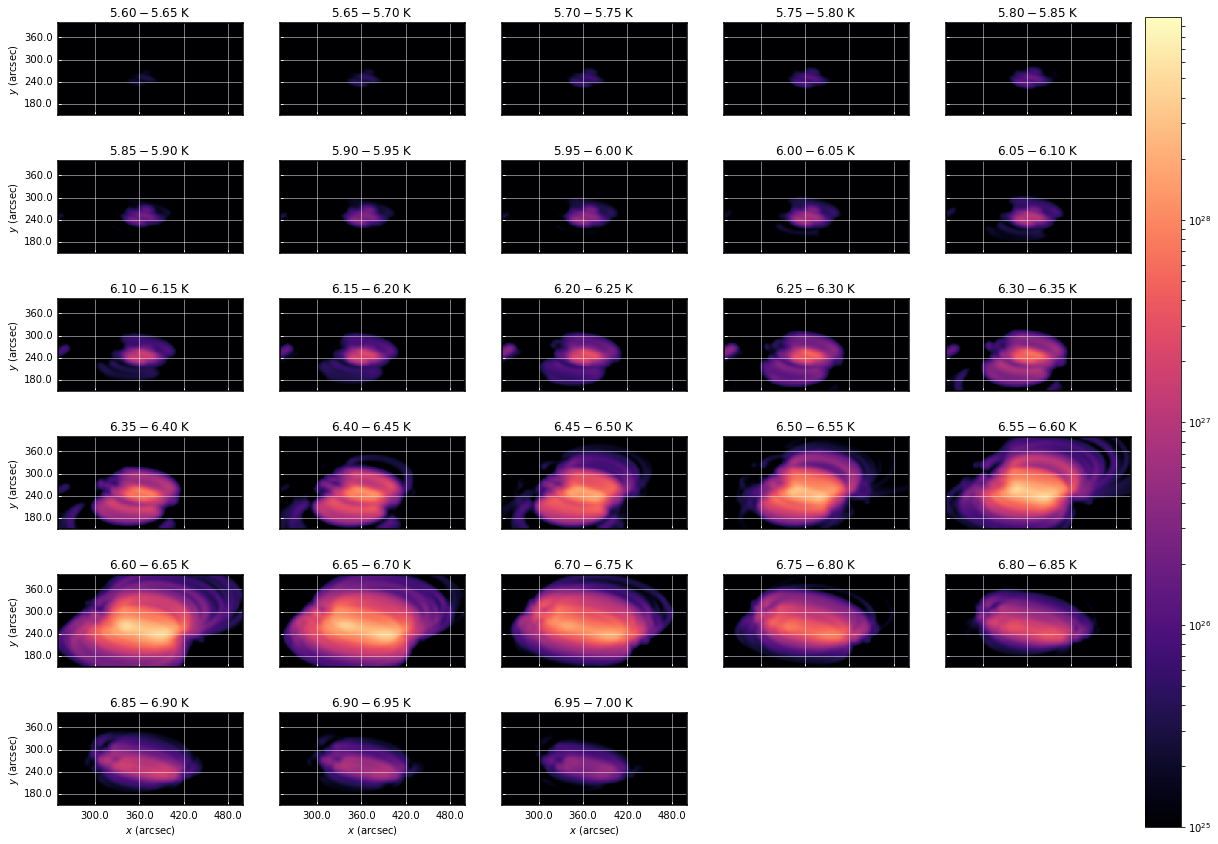

In [8]:
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(right=0.87)
cax = fig.add_axes([0.88, 0.12, 0.025, 0.75])
plt.subplots_adjust(hspace=0.1)
for i in range(time_averaged_ems['250'].temperature_bin_edges.shape[0]-1):
    # apply a filter to the 
    tmp = time_averaged_ems['250'][i].submap(u.Quantity([250,500],u.arcsec),u.Quantity([150,400],u.arcsec))
    tmp.data = gaussian_filter(tmp.data,
                               eis.channels[0]['gaussian_width']['x'].value
                              )
    # set up axes properly and add plot
    ax = fig.add_subplot(6,5,i+1,projection=tmp)
    im = tmp.plot(axes=ax,
                  annotate=False,
                  cmap=matplotlib.cm.get_cmap('magma'),
                  norm=matplotlib.colors.SymLogNorm(1, vmin=1e25, vmax=1e29)
                 )
    # set title and labels
    ax.set_title(r'${t0:.2f}-{t1:.2f}$ {uni}'.format(t0=np.log10(tmp.meta['temp_a']),
                                                     t1=np.log10(tmp.meta['temp_b']),uni='K'))
    if i<25:
        ax.coords[0].set_ticklabel_visible(False)
    else:
        ax.set_xlabel(r'$x$ ({})'.format(u.Unit(tmp.meta['cunit1'])))
    if i%5==0:
        ax.set_ylabel(r'$y$ ({})'.format(u.Unit(tmp.meta['cunit2'])))
    else:
        ax.coords[1].set_ticklabel_visible(False)
cbar = fig.colorbar(im,cax=cax)

Now save the results to our local temporary data folder.

In [12]:
for key in time_averaged_ems:
    time_averaged_ems[key].save('../data/em_cubes_true_tn{}_t7500-12500.h5'.format(key))

In [10]:
foo = EMCube.restore('../data/em_cubes_tn250_t7500-12500.h5')

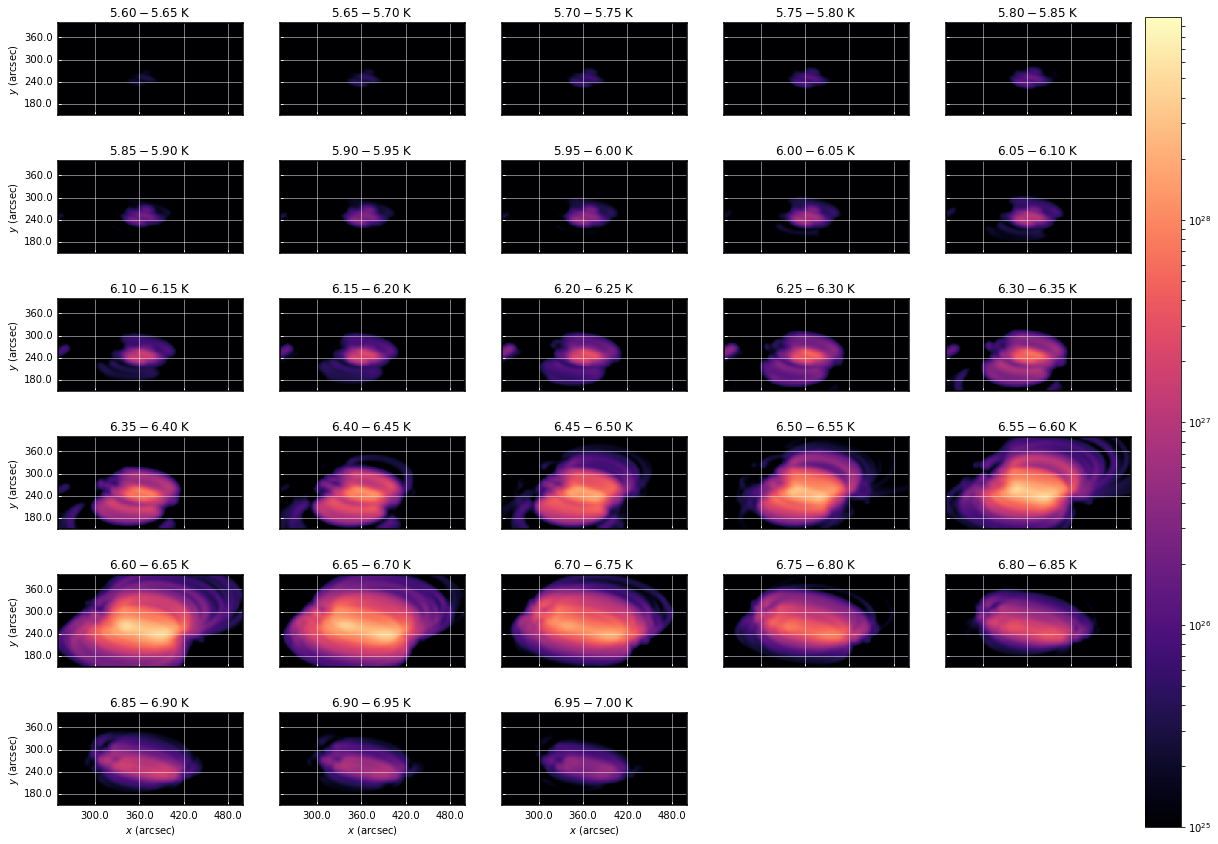

In [11]:
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(right=0.87)
cax = fig.add_axes([0.88, 0.12, 0.025, 0.75])
plt.subplots_adjust(hspace=0.1)
for i in range(foo.temperature_bin_edges.shape[0]-1):
    # apply a filter to the 
    tmp = foo[i].submap(u.Quantity([250,500],u.arcsec),u.Quantity([150,400],u.arcsec))
    tmp.data = gaussian_filter(tmp.data,
                               eis.channels[0]['gaussian_width']['x'].value
                              )
    # set up axes properly and add plot
    ax = fig.add_subplot(6,5,i+1,projection=tmp)
    im = tmp.plot(axes=ax,
                  annotate=False,
                  cmap=matplotlib.cm.get_cmap('magma'),
                  norm=matplotlib.colors.SymLogNorm(1, vmin=1e25, vmax=1e29)
                 )
    # set title and labels
    ax.set_title(r'${t0:.2f}-{t1:.2f}$ {uni}'.format(t0=np.log10(tmp.meta['temp_a']),
                                                     t1=np.log10(tmp.meta['temp_b']),uni='K'))
    if i<25:
        ax.coords[0].set_ticklabel_visible(False)
    else:
        ax.set_xlabel(r'$x$ ({})'.format(u.Unit(tmp.meta['cunit1'])))
    if i%5==0:
        ax.set_ylabel(r'$y$ ({})'.format(u.Unit(tmp.meta['cunit2'])))
    else:
        ax.coords[1].set_ticklabel_visible(False)
cbar = fig.colorbar(im,cax=cax)